# CAPSTONE PROJECT : SENTIMENT ANALYST

> Capstone project yang diberikan yaitu melakukan sentiment anlyst terhadap
review yang diberikan pada akun X @tanyarlfes yang berisikan tanggapan atau tweet terkait IKN




# Load Library dan Dataset

In [ ]:
# Menginstall beberapa library yang dibutuhkan
!pip install Sastrawi
!pip install vaderSentiment
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
# Melakukan Import Libary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [ ]:
# Melakukan Setting Tampilan Dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
# Load Dataset
df =pd.read_csv('ikn-tanyarlfes.csv')
df

,tweet,username,anotator 1,anotator 2,anotator 3,labeling
0,@tanyarlfes 14M buat satu rumah mentri padahal rumah 400-500 juta udah bagus 14M tuh bisa ngasih makan berapa juta jiwa cobaa wkwk zolim bgt sumpah dari awal gak setuju bgt sama proyek ini mana ngusir masyarakat adat juga (cmiiw yaa aku baca di portal berita),lasakna,negatif,negatif,negatif,negatif
1,@lasakna @tanyarlfes dah gile ya anjir 14M buat 1 rumah pejabat wkwk mending luhk kasih akses pendidikan daerah pelosok noh biar ga menuju indonesia (c)emas,soizleil,negatif,negatif,negatif,negatif
2,@tanyarlfes beritanya disini sebenernya beberapa portal berita juga bahas ini tapi aku cari di historyku udh gaadaa:( aku open discussion yaa (gak nerima diskusi sama buzz3r malesss) https://t.co/8KPtbyuSg3,lasakna,positif,netral,netral,netral
3,@lasakna @tanyarlfes 14M memang mahal banget tapi standarnya nggak 400-500 juta juga. Harga 500 untuk sebuah rumah utuh masih kurang minimal kisaran brp M. Sanggah dikit aja,serebeloom,negatif,negatif,positif,negatif
4,@lasakna @tanyarlfes Anggarannya 14M???? Per 1 rumah pejabat. Padahal dg 14M udh brp banyak masyarakat indo yg bisa disejahterakan,louusun,negatif,negatif,negatif,negatif
5,@lasakna @tanyarlfes Aku bukan buzzer politik. Rumah pejabat apalagi sekelas menteri wajar kalo rumah dinasnya sampe 14M. Karena rumah itu tetep milik negara yg nantinya akan ditinggali menteri berikutnya. Karena kalo rumah dinas dibangun pas2an bakal disorot negara lain. (1),dontbotherinme,positif,positif,positif,positif
6,@lasakna @tanyarlfes tapi mon maap 400-500 juta buat rumah kayanya ga mungkin juga daerahku aja tanahnya doang 700 juta tanah aja blm ada bangunannya,taehyungwjfe,positif,positif,positif,positif
7,@lasakna @tanyarlfes Program Sir Anies tentang pengembangan 40 kota agar sprt Jakarta itu lbh reasonable. Biar orang2 ga perlu harus ke jakarta demi cari kerjaan dan mnikmati transportasi umum.,randhilicious,negatif,negatif,positif,negatif
8,@lasakna @tanyarlfes 14M dikali berapa jumla rumah ratusan M bisa perbaikin sistem pelayanan bisa bangun pelayanan masyarakat yg blm merata bisa benerin banyak sekolah,youngmasterjcw,negatif,negatif,positif,negatif
9,@lasakna @tanyarlfes Aku malah menduga (semoga salah dugaanku) kalau 14M itu ada kongkalikong dan total mbangun rumahnya gak sampe/jauh dibawah 14M. Semoga gak bener dugaanku,GDANGGORENG,negatif,negatif,negatif,negatif


# Exploratory Data Analysis

In [ ]:
# Menampilkan Informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet       89 non-null     object
 1   username    87 non-null     object
 2   anotator 1  89 non-null     object
 3   anotator 2  89 non-null     object
 4   anotator 3  89 non-null     object
 5   labeling    89 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [ ]:
# Menampilkan Deskripsi dari Dataset
df.describe()

,tweet,username,anotator 1,anotator 2,anotator 3,labeling
count,89,87,89,89,89,89
unique,89,86,2,4,3,3
top,@tanyarlfes 14M buat satu rumah mentri padahal rumah 400-500 juta udah bagus 14M tuh bisa ngasih makan berapa juta jiwa cobaa wkwk zolim bgt sumpah dari awal gak setuju bgt sama proyek ini mana ngusir masyarakat adat juga (cmiiw yaa aku baca di portal berita),lasakna,negatif,negatif,negatif,negatif
freq,1,2,78,54,74,79


In [ ]:
# Mengecek Kolom yang null
df.isnull().sum()

,0
tweet,0
username,2
anotator 1,0
anotator 2,0
anotator 3,0
labeling,0


In [ ]:
# Mengecek duplicate data di seluruh kolom
df.duplicated().sum()

0

In [ ]:
# Mengecek Duplicate data di kolom tweet
df["tweet"].duplicated().sum()

0

### Analysis di proses EDA

Dataset memiliki 89 baris data dengan 6 kolom yang dimana terdiri dari

* Kolom tweet
* Kolom username
* Kolom Anotator 1
* Kolom Anotator 2
* Kolom anotator 3
* Kolom Labelling

Dataset ini merupakan dataset berisikan tweet terkait IKN yang dimana sudah terdapat labbeling sentiment baik dari kolom anotator 1, anotator 2, dan anotator 3 merupakan sentiment dari 3 anotator dan disimpulkan pada kolom Labelling. **Tapi dalam Capstone project ini kami akan melakukan sentiment membuat label baru untuk tweet yang ada dengan menggunakan model pembelajaran mesin.**


**Nilai NULL**

Dataset ini memiliki 2 nilai NULL pada kolom username yang dimana kami tidak melakukan drop atau mereplace untuk nilai NULL tersebut karena kolom username merupakan kolom yang diperlukan dalam sentiment analyst yaitu kolom tweet sehingga kami tidak mempermasalahkan untuk kolom username karena tidak mengganggu dalam melakukan sentiment


**Nilai Duplicate**

Dataset ini tidak memiliki nilai duplicate baik secara keseluruhan maupun yang ada di kolom tweet.



# Cleansing Data

Melakukan pembersihan data agar data dapat dilakukan pengolahan agar bisa dilakukan sentiment.

In [ ]:
# Membuat dataset copy agar data asli tidak berubah
# mengambil kolom username dan tweet , dan menghapus kolom sisanya karena tidak diperlukan
df_copy = df[['username','tweet']].copy()
df_copy

,username,tweet
0,lasakna,@tanyarlfes 14M buat satu rumah mentri padahal rumah 400-500 juta udah bagus 14M tuh bisa ngasih makan berapa juta jiwa cobaa wkwk zolim bgt sumpah dari awal gak setuju bgt sama proyek ini mana ngusir masyarakat adat juga (cmiiw yaa aku baca di portal berita)
1,soizleil,@lasakna @tanyarlfes dah gile ya anjir 14M buat 1 rumah pejabat wkwk mending luhk kasih akses pendidikan daerah pelosok noh biar ga menuju indonesia (c)emas
2,lasakna,@tanyarlfes beritanya disini sebenernya beberapa portal berita juga bahas ini tapi aku cari di historyku udh gaadaa:( aku open discussion yaa (gak nerima diskusi sama buzz3r malesss) https://t.co/8KPtbyuSg3
3,serebeloom,@lasakna @tanyarlfes 14M memang mahal banget tapi standarnya nggak 400-500 juta juga. Harga 500 untuk sebuah rumah utuh masih kurang minimal kisaran brp M. Sanggah dikit aja
4,louusun,@lasakna @tanyarlfes Anggarannya 14M???? Per 1 rumah pejabat. Padahal dg 14M udh brp banyak masyarakat indo yg bisa disejahterakan
5,dontbotherinme,@lasakna @tanyarlfes Aku bukan buzzer politik. Rumah pejabat apalagi sekelas menteri wajar kalo rumah dinasnya sampe 14M. Karena rumah itu tetep milik negara yg nantinya akan ditinggali menteri berikutnya. Karena kalo rumah dinas dibangun pas2an bakal disorot negara lain. (1)
6,taehyungwjfe,@lasakna @tanyarlfes tapi mon maap 400-500 juta buat rumah kayanya ga mungkin juga daerahku aja tanahnya doang 700 juta tanah aja blm ada bangunannya
7,randhilicious,@lasakna @tanyarlfes Program Sir Anies tentang pengembangan 40 kota agar sprt Jakarta itu lbh reasonable. Biar orang2 ga perlu harus ke jakarta demi cari kerjaan dan mnikmati transportasi umum.
8,youngmasterjcw,@lasakna @tanyarlfes 14M dikali berapa jumla rumah ratusan M bisa perbaikin sistem pelayanan bisa bangun pelayanan masyarakat yg blm merata bisa benerin banyak sekolah
9,GDANGGORENG,@lasakna @tanyarlfes Aku malah menduga (semoga salah dugaanku) kalau 14M itu ada kongkalikong dan total mbangun rumahnya gak sampe/jauh dibawah 14M. Semoga gak bener dugaanku


In [ ]:
# Manipulasi membuat data menjadi lower
df_copy['tweet'] = df_copy['tweet'].str.lower()

In [ ]:
import re
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Menghapus mention (seperti @username) dari teks.
  text = re.sub(r'#\w+', '', text)           # Menghapus tagar (hashtag) dari teks.
  text = re.sub(r'RT[\s]+', '', text)        # Menghapus teks "RT" (Retweet)
  text = re.sub(r'https?://\S+', '', text)   # Menghapus URL (tautan web)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)  # Menghapus karakter selain huruf spasi
  text = re.sub(r'\s+', ' ', text).strip()   # Mengubah spasi ganda menjadi satu dan menghapus spasi di awal dan akhir teks

  return text

df_copy['tweet']= df_copy['tweet'].apply(clean_twitter_text)

In [ ]:
# Menghapus angka dalam kolom tweet
df_copy['tweet'] = df_copy['tweet'].str.replace('\d+', '', regex=True)

In [ ]:
df_copy

,username,tweet
0,lasakna,m buat satu rumah mentri padahal rumah juta udah bagus m tuh bisa ngasih makan berapa juta jiwa cobaa wkwk zolim bgt sumpah dari awal gak setuju bgt sama proyek ini mana ngusir masyarakat adat juga cmiiw yaa aku baca di portal berita
1,soizleil,dah gile ya anjir m buat rumah pejabat wkwk mending luhk kasih akses pendidikan daerah pelosok noh biar ga menuju indonesia cemas
2,lasakna,beritanya disini sebenernya beberapa portal berita juga bahas ini tapi aku cari di historyku udh gaadaa aku open discussion yaa gak nerima diskusi sama buzzr malesss
3,serebeloom,m memang mahal banget tapi standarnya nggak juta juga harga untuk sebuah rumah utuh masih kurang minimal kisaran brp m sanggah dikit aja
4,louusun,anggarannya m per rumah pejabat padahal dg m udh brp banyak masyarakat indo yg bisa disejahterakan
5,dontbotherinme,aku bukan buzzer politik rumah pejabat apalagi sekelas menteri wajar kalo rumah dinasnya sampe m karena rumah itu tetep milik negara yg nantinya akan ditinggali menteri berikutnya karena kalo rumah dinas dibangun pasan bakal disorot negara lain
6,taehyungwjfe,tapi mon maap juta buat rumah kayanya ga mungkin juga daerahku aja tanahnya doang juta tanah aja blm ada bangunannya
7,randhilicious,program sir anies tentang pengembangan kota agar sprt jakarta itu lbh reasonable biar orang ga perlu harus ke jakarta demi cari kerjaan dan mnikmati transportasi umum
8,youngmasterjcw,m dikali berapa jumla rumah ratusan m bisa perbaikin sistem pelayanan bisa bangun pelayanan masyarakat yg blm merata bisa benerin banyak sekolah
9,GDANGGORENG,aku malah menduga semoga salah dugaanku kalau m itu ada kongkalikong dan total mbangun rumahnya gak sampejauh dibawah m semoga gak bener dugaanku


# Preprocessing Data

## Menghapus Stopword

In [ ]:
# Download modul yang diperlukan
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stopwords.words('indonesian')

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Melakukan drop stopword dan kalimat typo
drop_text =['ga','ngga', 'yg', 'tp','udah', 'emng', 'udh', 'jg', 'ntu', 'bkn' , 'tau', 'klo',
            'mah', 'gituu', 'trus', 'dulu', 'ikaen', 'bodetabek','krn', 'gua', 'liat',
            'dgn', 'msih', 'bnyk', 'skrg', 'trus', 'apalgi', 'dn','nih', 'dr', 'gak',
            'yh', 'doang', 'blm', 'brp', 'n', 'dll', 'cmn', 'orng', 'wrga', 'pda', 'pdhl',
            'mrka', 'dri', 'knp', 'g', 'emg', 'ama', 'ak', 'smp', 'pas', 'pulkam', 'kmrn',
            'tu', 'gapernah', 'liat', 'bpn', 'ampe', 'kek', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
            'kalo', 'amp', 'nya', 'sih', 'si', 'tdk', 'tuh', 'utk','jd', 'jgn', 'sdh',  'n', 't',
            'nyg','hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'wkwk', 'wkwkwk', 'haha',
            "gaperlu", "gw","m", "gk",  "kh", "masy", "jt", "jd", "yaiti", "kyk",'tetep','scr',
            'ky', 'byk', 'bkin', 'tsb' ,'bs', 'kyk', 'mhs', 'kl' ,'sm', 'cttn', 'smpe', 'skrg',
            'lg', 'aj', 'aja', 'dmn', 'lbh', 'karna' ,'crita', 'jd', 'kaga', 'kang', 'nguak',
            'pengen', 'gini', 'dpt','anjir' , 'tuh', 'wkwk', 'cmiiw', 'dah', 'org',
            'luhk', 'noh',  'Per', 'buzzr', 'pasan',  'doang', 'kongkalingkong', 'iykyk', 'condong',
            'digembor', 'gemborin', 'km', 'situ', 'jerigen', 'sir', 'anies', 'sprt','gaada',
            'macem', 'enggak', 'dar', 'awokwowkwok', 'b', 'spt', 'gamau', 'bla', 'eh','lu', 'bjort', 'krna',
            'sm', 'emg', 'friendly'
]
stop_words = stopwords.words('indonesian') + stopwords.words('english') + drop_text
df_copy['tweet'] = df_copy['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_copy['tweet']

,tweet
0,rumah mentri rumah juta bagus ngasih makan juta jiwa cobaa zolim bgt sumpah setuju bgt proyek ngusir masyarakat adat yaa baca portal berita
1,gile ya rumah pejabat mending kasih akses pendidikan daerah pelosok biar indonesia cemas
2,beritanya sebenernya portal berita bahas cari historyku gaadaa open discussion yaa nerima diskusi malesss
3,mahal banget standarnya nggak juta harga rumah utuh minimal kisaran sanggah dikit
4,anggarannya rumah pejabat masyarakat indo disejahterakan
5,buzzer politik rumah pejabat sekelas menteri wajar rumah dinasnya sampe rumah milik negara ditinggali menteri rumah dinas dibangun disorot negara
6,mon maap juta rumah kayanya daerahku tanahnya juta tanah bangunannya
7,program pengembangan kota jakarta reasonable biar orang jakarta cari kerjaan mnikmati transportasi
8,dikali jumla rumah ratusan perbaikin sistem pelayanan bangun pelayanan masyarakat merata benerin sekolah
9,menduga semoga salah dugaanku kongkalikong total mbangun rumahnya sampejauh dibawah semoga bener dugaanku


## Normalization

In [ ]:
# mereplace kalimat typo yang berguna dalam sentiment
Replace_text = {
    'dzholim' : 'zalim','dzolim' : 'zalim', 'anjingggg' : 'anjing', 'kusus' : 'khusus',
    'mubadzir' : 'mubazir','menelam' : 'telan', 'mevvah' : 'mewah','amdalnya' : 'handal',
    'kedzoliman' : 'zalim','gede' : 'besar','batttt': 'banget','bgt' : 'banget',
    'jjur':'jujur','mon' : 'mohon','maap': 'maaf','ngasih': 'kasih','cobaa': 'coba',
    'ngusir': 'usir', 'gile': 'gila','indo': 'Indonesia','mbangun': 'bangun',
    'mnikmati': 'menikmati','jumla':'jumlah','zolim':'zalim','malesss' : 'malas',
    'ngeluh' : 'keluh','pasiensediain' : 'pasien sediain','ngerusak' : 'rusak',
    'bnr' : 'benar','bgus' : 'bagus','sorry' : 'maaf','korup' : 'korupsi',
    'habisin' : 'habis','korupppp' : 'korupsi','dikorupsiin': 'korupsi',
    'utang' : 'hutang','ngabisin' :'habis','adamaju': 'ada maju',
    'sampejauh': 'sampe jauh','mentri': 'menteri'
}
# Fungsi untuk mengganti kata sesuai Replace_text
def replace(str_text):
    for word, replacement in Replace_text.items():
        str_text = re.sub(r'\b' + re.escape(word) + r'\b', replacement, str_text)
    return str_text

df_copy['tweet'] = df_copy['tweet'].apply(lambda x : replace(x))

In [ ]:
df_copy['tweet']

,tweet
0,rumah menteri rumah juta bagus kasih makan juta jiwa coba zalim banget sumpah setuju banget proyek usir masyarakat adat yaa baca portal berita
1,gila ya rumah pejabat mending kasih akses pendidikan daerah pelosok biar indonesia cemas
2,beritanya sebenernya portal berita bahas cari historyku gaadaa open discussion yaa nerima diskusi malas
3,mahal banget standarnya nggak juta harga rumah utuh minimal kisaran sanggah dikit
4,anggarannya rumah pejabat masyarakat Indonesia disejahterakan
5,buzzer politik rumah pejabat sekelas menteri wajar rumah dinasnya sampe rumah milik negara ditinggali menteri rumah dinas dibangun disorot negara
6,mohon maaf juta rumah kayanya daerahku tanahnya juta tanah bangunannya
7,program pengembangan kota jakarta reasonable biar orang jakarta cari kerjaan menikmati transportasi
8,dikali jumlah rumah ratusan perbaikin sistem pelayanan bangun pelayanan masyarakat merata benerin sekolah
9,menduga semoga salah dugaanku kongkalikong total bangun rumahnya sampe jauh dibawah semoga bener dugaanku


## Stemming

In [ ]:
stemmer = StemmerFactory().create_stemmer()
df_copy['tweet'] = df_copy['tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

In [ ]:
# mereplace kata tuju menjadi setuju karena kata setuju mengalami perubahan menjadi tuju ketika distemming
df_copy['tweet'] = df_copy['tweet'].str.replace(r'\btuju\b', 'setuju', regex=True)
df_copy['tweet']

,tweet
0,rumah menteri rumah juta bagus kasih makan juta jiwa coba zalim banget sumpah setuju banget proyek usir masyarakat adat yaa baca portal berita
1,gila ya rumah jabat mending kasih akses didik daerah pelosok biar indonesia cemas
2,berita sebenernya portal berita bahas cari historyku gaadaa open discussion yaa nerima diskusi malas
3,mahal banget standar nggak juta harga rumah utuh minimal kisar sanggah dikit
4,anggar rumah jabat masyarakat indonesia sejahtera
5,buzzer politik rumah jabat kelas menteri wajar rumah dinas sampe rumah milik negara tinggal menteri rumah dinas bangun sorot negara
6,mohon maaf juta rumah kaya daerah tanah juta tanah bangun
7,program kembang kota jakarta reasonable biar orang jakarta cari kerja nikmat transportasi
8,kali jumlah rumah ratus perbaikin sistem layan bangun layan masyarakat rata benerin sekolah
9,duga moga salah duga kongkalikong total bangun rumah sampe jauh bawah moga bener duga


# Sentiment Analyst (labeling sentiment)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

additional = {
    'rugi': -1,'buruk': -0.6,'jelek': -0.6,'lelet': -0.7,'gagal': -0.5,'parah': -0.6,
    'mahal': -0.3,'maaf': -0.3,'tolong': -0.1, 'hilang': -0.3,'promo': 0.6,
    'ganggu': 0.3,'bagus': 0.5,'potong': -1,'baik': 0.5,'salah': -0.5,
    'payah': -0.4,'benerin': -0.5,'lambat': -0.8,'mati': -0.7,'minimal': -0.3,'susah': -0.6,
    'capek': -0.7,'kacau': -0.3,'tagih': -0.3,'mantap': 0.7,'sulit': -0.6,'aneh': -0.7,
    'responsif' :0.6,'zalim' : -0.7,'usir' : -0.5,'gila' : -0.7,'cemas' : -0.3,
    'wajar' : 0.2,'perbaikin' : -0.3,'kongkalikong' : -0.5,'korupsi' : -0.8,
    'ugalugalan' : -0.7,'isu' : - 0.3,'mending' : -0.2,'hambur' : -0.4,
    'mangkrak' : - 0.7,'rendah' : -0.7,'bodoh' : -1,'putus' : -0.3,'benci' : -1,
    'macet' : -0.7,'keluh' : -0.7,'domplang' : -0.5,'manja' : -0.3,'mubadzir' : -0.7,
    'hutang' : -0.5,'krisis' : -0.6,'boros' : -0.5,'bobrok' : -0.5,'demo' : -0.3,
    'sedih' : -0.3,'rusak' : -0.7,'urgent' : -0.2,'buang' : -0.3,'sejahtera' : 0.3,
    'manggu' : -0.1,'mending' : -0.2,'babat' :-0.2,'risih' : -0.3,'better' : 0.2,
    'nafsu' : -0.8,'ego' : -0.8,'gengsi' : -0.3,'mewah' : -0.2,'anjing' : -0.7,
    'ilegal' : -0.7,'tahan' : 0.2,'paksa' : -0.7,'setuju': 0.5,'standar': 0.1,
    'sanggah': -0.1,'dikit': -0.3,'sorot': -0.1,'reasonable': 0.2,'layan': -0.1,
    'duga': -0.3,'jauh': -0.7,'rawan': -0.7,'beli': -0.1,'kompeten': 0.3,
    'desak' : -0.1,'milyar' : -0.2,'muak' : -0.7,'fasilitas' : 0.2,'akses' : 0.2,
    'proyek' : 0.2,'penting' : 0.5,'deserve' : 0.5,'anggaran' : 0.2,'buzzer': -0.3,
    'duit':-0.3,'uang' :-0.3
}

analyzer.lexicon.update(additional)

df_copy['Sentiment']=df_copy['tweet'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

In [ ]:
df_copy

,username,tweet,Sentiment
0,lasakna,rumah menteri rumah juta bagus kasih makan juta jiwa coba zalim banget sumpah setuju banget proyek usir masyarakat adat yaa baca portal berita,Netral
1,soizleil,gila ya rumah jabat mending kasih akses didik daerah pelosok biar indonesia cemas,Negatif
2,lasakna,berita sebenernya portal berita bahas cari historyku gaadaa open discussion yaa nerima diskusi malas,Netral
3,serebeloom,mahal banget standar nggak juta harga rumah utuh minimal kisar sanggah dikit,Negatif
4,louusun,anggar rumah jabat masyarakat indonesia sejahtera,Positif
5,dontbotherinme,buzzer politik rumah jabat kelas menteri wajar rumah dinas sampe rumah milik negara tinggal menteri rumah dinas bangun sorot negara,Negatif
6,taehyungwjfe,mohon maaf juta rumah kaya daerah tanah juta tanah bangun,Negatif
7,randhilicious,program kembang kota jakarta reasonable biar orang jakarta cari kerja nikmat transportasi,Positif
8,youngmasterjcw,kali jumlah rumah ratus perbaikin sistem layan bangun layan masyarakat rata benerin sekolah,Negatif
9,GDANGGORENG,duga moga salah duga kongkalikong total bangun rumah sampe jauh bawah moga bener duga,Negatif


In [ ]:
# menampilkan count sentiment
df_copy['Sentiment'].value_counts()

,count
Sentiment,
Negatif,64
Netral,19
Positif,6


In [ ]:
# menampilkan sentiment Positif
df_copy[df_copy['Sentiment'] == 'Positif']

,username,tweet,Sentiment
4,louusun,anggar rumah jabat masyarakat indonesia sejahtera,Positif
7,randhilicious,program kembang kota jakarta reasonable biar orang jakarta cari kerja nikmat transportasi,Positif
41,nazmiiiee,fasilitas didik sehat ada uda stable deh mikir boro boro didik sehat daerah air bersih mas ko bisa buang duit segitu msi lebi urgent,Positif
79,yorinforlyfe,daerah deserve baik didik sehat jalan jaring internet pustaka sekolah univ kota dsb butuh bukubuku duduk deserve dapet baik layak hidup ngapain buang uang bikin istana,Positif
87,AQuiscent,maksain kaum tengah lagak crazy rich paham mampu kota mati rumah menteri rencana patung bahas nangisin makan deket kantor perintah prioritas,Positif
88,designnbydino,sebnernya setuju perata bangun jawa bagus cuman bikin kota pake kota kalimantan habis anggar kota gitu rusak alam sana,Positif


In [ ]:
# menampilkan sentiment Netral
df_copy[df_copy['Sentiment'] == 'Netral']

,username,tweet,Sentiment
0,lasakna,rumah menteri rumah juta bagus kasih makan juta jiwa coba zalim banget sumpah setuju banget proyek usir masyarakat adat yaa baca portal berita,Netral
2,lasakna,berita sebenernya portal berita bahas cari historyku gaadaa open discussion yaa nerima diskusi malas,Netral
10,kiwitiauw,rumah juta menteri model petak kah iya bikin ikn,Netral
12,panggilajaayu,banding nyoblos prabroro anisa,Netral
13,_L0KA,simak,Netral
14,cloudzise,paham tim nyimak,Netral
22,chickenhainan,ikn program telan biaya fantatis riset matang bangun urgensi ikn untung orang jatah tetap sana fasilitas mewah vidio edar ikn bangun wilayah,Netral
27,labibfuady,biar detail,Netral
31,ogenjidesuka,mahasiswa bikin kota ya pindah jakarta dki banjarmasin dki balikpapan gitu lohh kembangin kota bikin kota anggar besar battt,Netral
42,asbaklapau,imo sesuai gagas bikin rata kota kota kayak jkt kota masyarakat sebar rantau lintas pulau,Netral


In [ ]:
# menampilkan sentiment Negatif
df_copy[df_copy['Sentiment'] == 'Negatif']

,username,tweet,Sentiment
1,soizleil,gila ya rumah jabat mending kasih akses didik daerah pelosok biar indonesia cemas,Negatif
3,serebeloom,mahal banget standar nggak juta harga rumah utuh minimal kisar sanggah dikit,Negatif
5,dontbotherinme,buzzer politik rumah jabat kelas menteri wajar rumah dinas sampe rumah milik negara tinggal menteri rumah dinas bangun sorot negara,Negatif
6,taehyungwjfe,mohon maaf juta rumah kaya daerah tanah juta tanah bangun,Negatif
8,youngmasterjcw,kali jumlah rumah ratus perbaikin sistem layan bangun layan masyarakat rata benerin sekolah,Negatif
9,GDANGGORENG,duga moga salah duga kongkalikong total bangun rumah sampe jauh bawah moga bener duga,Negatif
11,wenairead,mahasiswa turut proyek potensi korupsi ugalugalan dana alih bangun sekolah daerah dalam batas baik sekolah puskesmas rusak indonesia dampak,Negatif
15,Lylr_21,urgent biaya kota pindah kota ada maju jakarta lahan korupsi rawan kena isu lingkung hutan kalimantan biar hutan lindung,Negatif
16,moonavile,sesuai dilaksanain bilang merta biar java central asli simbol perata bikin rumah jabat satu warga beli air bersih pake,Negatif
17,pillowaguilina,ikn mending kota kasih proyek strategis negara kaya solo biar kembang ikn mending transportasi kabupaten layak ikn mending bikin puskesmas ramah pasien ain dokter kompeten,Negatif


Setelah dilakukan sentiment labeling didapatkan jumlah dari sentiment
* Negatif = 64 data
* Netral  = 19 data
* Positif = 6 data

Dari hasil sentiment tersebut didapatkan bahwa review dataset ini menunjukkan tanggapan yang negatif terkait IKN, dan juga dari dataset ini juga akibatnya terjadinya ketidakseimbangan sentiment dalam dataset dan juga dataset yang kecil yang membuat saat proses modelling akan sulit melatih model agar mendapat model yang cukup baik/

# Visualisasi Sentiment

## Visualisasi keseluruhan

In [ ]:
# Menghitung frekuensi kemunculan setiap kata
freq = pd.Series(' '.join(df_copy['tweet']).split()).value_counts()
head_freq=freq.head(20)
head_freq

,count
ikn,63
bangun,41
kota,40
perata,32
rumah,28
banget,26
jabat,17
orang,16
daerah,16
bikin,15


In [ ]:
# histrogram
fig = px.histogram(head_freq, x=head_freq.index, y=head_freq.values)
fig.update_layout(
    title="Total frekuensi kata",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata"
)
fig.show()

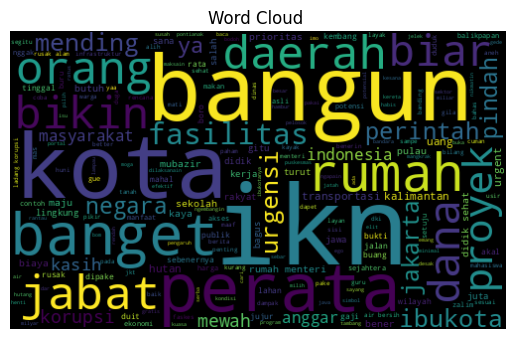

In [ ]:
# Wordcloud
all_words = ' '.join([i for i in df_copy['tweet']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud ')
plt.show()

## Visualisasi Sentiment

In [ ]:
# Distribusi label sentiment
temp = df_copy.groupby('Sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='viridis')

,Sentiment,tweet
0,Negatif,64
1,Netral,19
2,Positif,6


In [ ]:
# Distribusi label sentiment
fig = px.bar(temp, x='Sentiment', y='tweet', color='Sentiment', title='Distribusi Label Sentiment')
fig.show()

In [ ]:
# buat pie chart
fig = px.pie(temp, values='tweet', names='Sentiment', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Visualisasi Sentiment Positif

In [ ]:
# Menghitung frekuensi kata di sentiment Positif
df_postif = df_copy[df_copy['Sentiment'] == 'Positif']
TPostif = pd.Series(' '.join(df_postif['tweet']).split()).value_counts()
head_postif=TPostif.head(20)
head_postif

,count
kota,6
didik,3
sehat,3
anggar,2
rumah,2
bikin,2
baik,2
deserve,2
buang,2
daerah,2


In [ ]:
# histrogram
fig_pos = px.histogram(head_postif, x=head_postif.index, y=head_postif.values)
fig_pos.update_layout(
    title="Total kata untuk sentimen Positif",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata",
    width=1300,
    height=500,
    xaxis=dict(tickangle=0)
)
fig_pos.show()

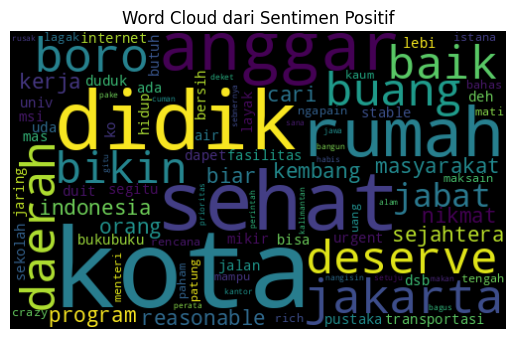

In [ ]:
# WordCloud
all_words_positif = ' '.join([i for i in df_postif['tweet']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

### Visualisasi Sentiment Negatif

In [ ]:
# Menghitung frekuensi kata di sentiment Negatif
df_neg = df_copy[df_copy['Sentiment'] == 'Negatif']
Tneg = pd.Series(' '.join(df_neg['tweet']).split()).value_counts()
head_neg=Tneg.head(20)
head_neg

,count
ikn,48
bangun,33
perata,27
kota,21
banget,21
rumah,20
jabat,15
daerah,14
dana,13
biar,12


In [ ]:
# histrogram
fig_neg = px.histogram(head_neg, x=head_neg.index, y=head_neg.values)
fig_neg.update_layout(
    title="Total kata untuk sentimen Negatif",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata",
    width=1300,
    height=500,
    xaxis=dict(tickangle=0)
)
fig_neg.show()

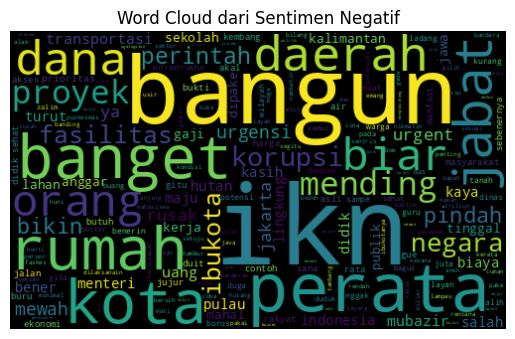

In [ ]:
# WordCloud
all_words_negatif = ' '.join([i for i in df_neg['tweet']])
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

### Visualisasi Sentiment Netral

In [ ]:
# Menghitung frekuensi kata di sentiment Netral
df_net = df_copy[df_copy['Sentiment'] == 'Netral']
Tnet = pd.Series(' '.join(df_net['tweet']).split()).value_counts()
head_net=Tnet.head(20)
head_net

,count
ikn,15
kota,13
bangun,7
rumah,6
banget,5
bikin,5
perata,4
masyarakat,3
menteri,3
jkt,3


In [ ]:
# histrogram
fig_net = px.histogram(head_net, x=head_net.index, y=head_net.values)
fig_net.update_layout(
    title="Total kata untuk sentimen Netral",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata",
    width=1300,
    height=500,
    xaxis=dict(tickangle=0)
)
fig_net.show()

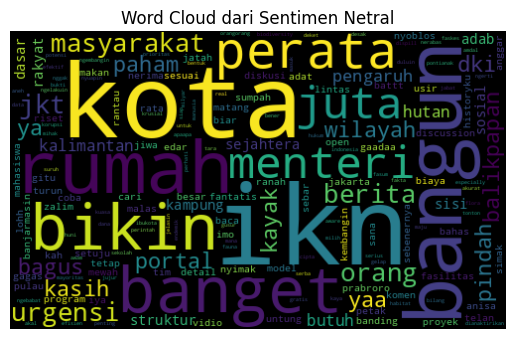

In [ ]:
# WordCloud
all_words_net = ' '.join([i for i in df_net['tweet']])
wordcloud_net = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_net)

plt.imshow(wordcloud_net, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

## Insight


> Hasil Sentiment Menunjukkan bahwasanya sebagian besar tanggapan tersebut kurang mendukung IKN



Terlihat dalam visualisasi sentiment negatif menunjukkan bahwa kata muncul berkaitan dengan dana / uang , seperti korupsi, dana, biaya, dan lainnya menunjukkan bahwa tanggapan public bahwa proyek IKN mengeluarkan banyak biaya, dan ada kemungkinan terjadi korupsi

# Modelling

## Vectorization (TF-DIF)

Mengubah data di kolom tweet yang sebelumnya berbentuk teks diubah ke bentuk numerik dengan metode TF-DIF

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_copy['tweet'])
X_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.21013133],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Split Data Trainning dan Testing

In [ ]:
# Memisahkan kolom sebagai kolom target dengan kolom fitur
x=X_tfidf               # kolom fitur
y=df_copy['Sentiment']  # kolom target

In [ ]:
# 20% data testing dan 80% data trainning
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
X_train.shape, X_test.shape

((71, 643), (18, 643))

In [ ]:
# menampilkan persebaran sentiment di data train
y_train.value_counts()

,count
Sentiment,
Negatif,51
Netral,15
Positif,5


In [ ]:
# menampilkan persebaran sentiment di data train
y_test.value_counts()

,count
Sentiment,
Negatif,13
Netral,4
Positif,1


Karena sentiment dalam dataset mengalami ketidakseimbangan yang dimana sentiment negatif jauh lebih banyak dari pada netral dan positif oleh karena itu dilakukan **Resampling** di data trainning agar data train lebih seimbang

## Resampling Data Trainning

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



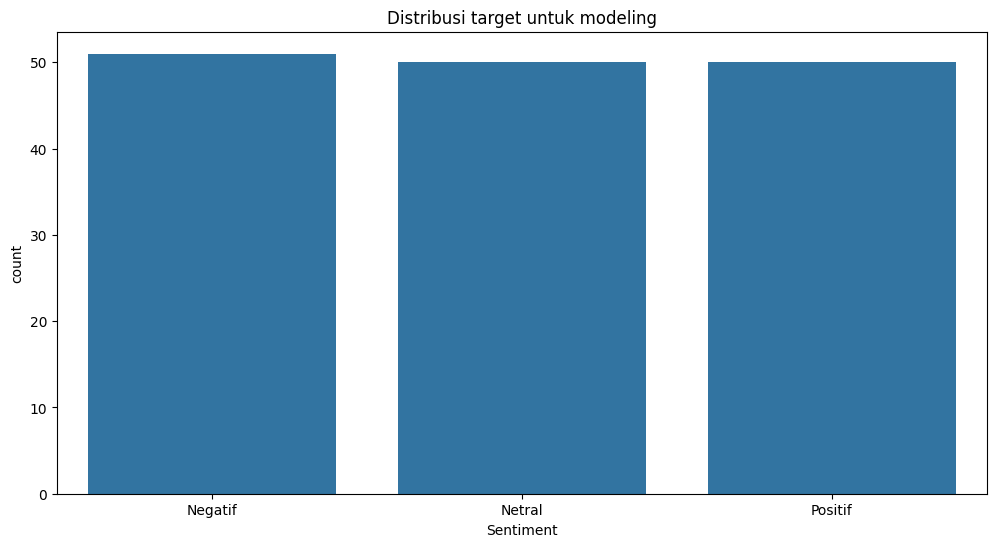

In [ ]:
# Resampling target agar data target seimbang dengan metode ADASYN

from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42,n_neighbors=4)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [ ]:
# menampilkan persebaran sentiment di data train
y_train.value_counts()

,count
Sentiment,
Negatif,51
Netral,50
Positif,50


Setelah dilakukan resampling pada data trainng, sekarang data trainng lebih seimbang sehingga model dapat lebih baik dalam melakukan modelling terhadap dataset ini

# Pembuatan Model

ada 3 hal yang kami lakukan dalam pembuatan model :
1. Melatih data dengan beberapa model dengan dilakukan tunning
2. Melakukan k-fold cross validation lalu melakukan trainning model
3. Melakukan resampling sebelum splitting dataset agar sentiment lebih seimbang baik di data training dan juga testing

## 1. Melatih data dengan beberapa model dengan dilakukan tunning

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# init parameters (tuning agar model semakin bagus)
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [ ]:
# melatih data
from sklearn.model_selection import GridSearchCV
rf_model = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42,class_weight='balanced'),
    param_grid=rf_param_grid,
    cv=5,  # Cross-validation folds
    scoring='accuracy',  # Metrik evaluasi
    verbose=1,  # Menampilkan proses pencarian
)

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

Evaluasi Model Random Forest

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.72      1.00      0.84        13
      Netral       0.00      0.00      0.00         4
     Positif       0.00      0.00      0.00         1

    accuracy                           0.72        18
   macro avg       0.24      0.33      0.28        18
weighted avg       0.52      0.72      0.61        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Membuat model Logistic Regression
log_reg = LogisticRegression(max_iter=3000, random_state=42,class_weight='balanced')

# Menentukan parameter untuk grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'penalty': ['l2'],                    # Regularization type (l2 adalah yang paling umum)
    'solver': ['liblinear', 'saga'],      # Algoritma solver yang digunakan
    'max_iter': [100, 200, 300]           # Jumlah iterasi yang digunakan dalam proses konvergensi
}

# Melakukan grid search dengan cross-validation (cv=5)
lr_model = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Melatih model dengan data training
lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=3000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

**Evaluasi Model Logistic Regression**

In [ ]:
y_pred_lr = lr_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Logistic Regression (Tuned):")
print(classification_report(y_test, y_pred_lr))



Classification Report for Logistic Regression (Tuned):
              precision    recall  f1-score   support

     Negatif       0.72      1.00      0.84        13
      Netral       0.00      0.00      0.00         4
     Positif       0.00      0.00      0.00         1

    accuracy                           0.72        18
   macro avg       0.24      0.33      0.28        18
weighted avg       0.52      0.72      0.61        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# Menentukan parameter untuk grid search
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],  # Parameter smoothing, menghindari probabilitas nol
    'fit_prior': [True, False]         # Menentukan apakah model akan menghitung probabilitas kelas priors
}

# Melakukan grid search dengan cross-validation (cv=5)
nb_model = GridSearchCV(estimator=mnb, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Melatih model dengan data training
nb_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluasi model
y_pred_nb = nb_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Naive Bayes model (Tuned):")
print(classification_report(y_test, y_pred_nb))



Classification Report for Naive Bayes model (Tuned):
              precision    recall  f1-score   support

     Negatif       0.76      1.00      0.87        13
      Netral       1.00      0.25      0.40         4
     Positif       0.00      0.00      0.00         1

    accuracy                           0.78        18
   macro avg       0.59      0.42      0.42        18
weighted avg       0.77      0.78      0.71        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### XGBoost (Extreme Gradient Boosting)

In [ ]:
pip install --upgrade xgboost


In [ ]:
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Subclass XGBClassifier untuk menambahkan metode __sklearn_tags__
class PatchedXGBClassifier(XGBClassifier):
    def __sklearn_tags__(self):
        return {
            "non_deterministic": False,
            "requires_positive_X": False,
            "poor_score": False,
            "no_validation": False,
            "multioutput": False,
            "multioutput_only": False,
            "binary_only": False,
            "requires_fit": True,
            "preserves_dtype": [np.float64, np.float32, np.int64, np.int32],
            "X_types": ["2darray"],
        }

# Membuat model XGBoost yang telah di-patch
xgb = PatchedXGBClassifier(random_state=42, nthread=-1)

# Encode y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Menentukan parameter untuk random search
param_dist = {
    'learning_rate': uniform(0.01, 0.3),             # Learning rate
    'n_estimators': randint(50, 200),                # Jumlah pohon keputusan (estimators)
    'max_depth': randint(3, 15),                      # Kedalaman maksimum pohon
    'min_child_weight': randint(1, 10),               # Bobot anak minimum
    'subsample': uniform(0.6, 0.4),                   # Proporsi sampel untuk pelatihan
    'colsample_bytree': uniform(0.6, 0.4),            # Proporsi fitur untuk setiap pohon
    'gamma': uniform(0, 0.5),                         # Mengurangi overfitting dengan penambahan penalti
    'scale_pos_weight': [1, 10, 100]                  # Menangani class imbalance
}

# Melakukan randomized search dengan cross-validation (cv=5)
xgb_model = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                               n_iter=50, scoring='accuracy', cv=5, random_state=42, n_jobs=-1, verbose=1)

# Melatih model dengan data training
xgb_model.fit(X_train, y_train_encoded)




/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The PatchedXGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Evaluasi Model
y_pred_xgb = xgb_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for XGBoost model (Tuned):")
print(classification_report(y_test_encoded, y_pred_xgb))

### SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Membuat model SVM
svm_model = SVC()

# Menentukan parameter untuk grid search
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Jenis kernel
    'degree': [2, 3, 4],            # Derajat polinomial (digunakan jika kernel='poly')
    'gamma': ['scale', 'auto']      # Kernel coefficient untuk 'rbf', 'poly', dan 'sigmoid'
}

# Inisialisasi GridSearchCV
svm_grid = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metrik evaluasi
    cv=5,                # Cross-validation dengan 5 fold
    verbose=1,           # Menampilkan proses tuning
    n_jobs=-1            # Menggunakan semua core yang tersedia
)

# Melatih model dengan data training
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluasi Model
y_pred_svm = svm_grid.best_estimator_.predict(X_test)

print("\n\nClassification Report for SVM model (Tuned):")
print(classification_report(y_test, y_pred_svm))



Classification Report for SVM model (Tuned):
              precision    recall  f1-score   support

     Negatif       0.72      1.00      0.84        13
      Netral       0.00      0.00      0.00         4
     Positif       0.00      0.00      0.00         1

    accuracy                           0.72        18
   macro avg       0.24      0.33      0.28        18
weighted avg       0.52      0.72      0.61        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Hasil

Setelah menggunakan 5 model mulai dari Random Forest, Logistic Regression, Naive Bayes, XGBoost , dan SVM model. Didapatkan evaluasi model dengan akurasi yang berbeda beda.
1. Random Forest dengan akurasi 0,72 tetapi belum bisa memprediksi sentiment netral dan possitf, dan lebih ke negatif
2. Logistic Regression dengan akurasi 0,72 tetapi belum bisa memprediksi sentiment netral dan possitf, dan lebih ke negatif
3. Naive bayes dengan akurasi 0,78 sudah bisa memprediksi sentiment negatif dan netral tetapi masih belum bisa untuk sentiment posistif
4. XGBoost dengan akurasi 0,61 tetapi belum bisa memprediksi sentiment netral dan possitf, dan lebih ke negatif
5. SVM  dengan akurasi 0,72 tetapi belum bisa memprediksi sentiment netral dan possitf, dan lebih ke negatif


> **Oleh karena itu dari kelima model, model yang paling baik yaitu NAIVE BAYES dengan akurasi paling tinggi 0,78 dan sudah lebih baik dalam memprediksi sentiment dari model lainnya**



### Pengujian Data Baru

In [ ]:
# karena naive bayes yang tertinggi model akan disimpam
import joblib

# Simpan model ke file
joblib.dump(nb_model.best_estimator_, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [ ]:
# menyimpan vektorization
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
# Mengambil input teks dari pengguna
new_text = input("Masukkan teks untuk prediksi sentimen: ")

# Mengubah teks menjadi bentuk numerik
transformed_text2 = tfidf_vectorizer.transform([new_text])

# Melakukan prediksi menggunakan model
prediction =nb_model.best_estimator_.predict(transformed_text2)

# Menampilkan hasil prediksi
print(f"Teks: {new_text}\nPrediksi Sentimen: {prediction}")

Masukkan teks untuk prediksi sentimen: korupsi
Teks: korupsi
Prediksi Sentimen: ['Negatif']


## 2. Melakukan k-fold cross validation lalu melakukan trainning model

Untuk meningkatkan performa dari model-model sebelumnya, dilakukan K-Fold Corss Validation agar dapat melihat akurasi trainning model disetiap bagian dataset (10 bagian dataset)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np

def Perform_cross_val(model, k, x, y, scoring):

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")



In [ ]:
# Model Random Forest
Perform_cross_val(rf_model.best_estimator_, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.7194444444444443
CV results: [0.66666667 0.55555556 0.77777778 0.77777778 0.66666667 0.88888889
 0.88888889 0.66666667 0.55555556 0.75      ]



In [ ]:
# Model Logistic Regression
Perform_cross_val(lr_model.best_estimator_, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.7194444444444443
CV results: [0.55555556 0.55555556 0.88888889 0.77777778 0.66666667 0.88888889
 0.88888889 0.66666667 0.55555556 0.75      ]



In [ ]:
# Model Naive Bayes
Perform_cross_val(nb_model.best_estimator_, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.5263888888888888
CV results: [0.44444444 0.66666667 0.66666667 0.44444444 0.55555556 0.66666667
 0.44444444 0.66666667 0.33333333 0.375     ]



In [ ]:
# Model SVM
Perform_cross_val(svm_grid.best_estimator_, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.7194444444444443
CV results: [0.55555556 0.55555556 0.88888889 0.77777778 0.66666667 0.88888889
 0.88888889 0.66666667 0.55555556 0.75      ]



In [ ]:
# menemukan indeks baris di setiap fold
def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1


In [ ]:
# menemukan indeks fold
find_fold_index(10, x)

fold 1: [0,8]
--------------------
fold 2: [9,17]
--------------------
fold 3: [18,26]
--------------------
fold 4: [27,35]
--------------------
fold 5: [36,44]
--------------------
fold 6: [45,53]
--------------------
fold 7: [54,62]
--------------------
fold 8: [63,71]
--------------------
fold 9: [72,80]
--------------------
fold 10: [81,88]
--------------------


### K-fold Naive bayes

Karena pada proses cross validation model naive bayes menunjukkan acurasi yang kecil pada fold 9 , maka dilakukan drop pada baris tersebut

In [ ]:
# menampilkan data pada kolon 72 sampai 81
df_copy.iloc[np.r_[72:81]]

,username,tweet,Sentiment
72,winterautumns_,perata mewah budget segitu perata daerah jalan tanah blok listrik mati buka faskes akses jalan pelosok gusur rakyat bikin daerah mewah megah jabat,Negatif
73,buknyahaya,prioritas ikn urgensi desak indonesia urgensi perhati perintah dispill rumah menteri milyar sejahtera fasum rakyat,Netral
74,1spidermark,zalim perintah bangun ikn tanda perata bangun zalim anjing gue muak banget gue mas tinggal pulau jawa rasa perata bangun dar angkot anjing daerah gue bener bener gd fasilitas yallah,Negatif
75,tuandadang,kota negara pindah daerah sepenuh kembang jakarta akses didik sehat perintah bicara perata hindar demo masyarakat kritis ibukota,Negatif
76,_SHISOYA_,manfaat ngaruh orang kaltim sbagai mahasiswa orang kaltim sedih banget ngeliat hutan ijo skarang digundulin bangun proyek pjabat udhnya hutan abis tambang illegal tambah orang bangun inainu,Negatif
77,AWRessy,orang awam ikn dasar ikn rumah kota dasar kota struktur sosial cipta adab kota ikn gusur struktur sosial,Netral
78,dinosaursysn,perata siap ngelakuin perata perata bagus duluin kasih jabat rumah gratis sekolah faskes kampung kampung jujur aneh banget,Netral
79,yorinforlyfe,daerah deserve baik didik sehat jalan jaring internet pustaka sekolah univ kota dsb butuh bukubuku duduk deserve dapet baik layak hidup ngapain buang uang bikin istana,Positif
80,NaN,urgensi anggar segitu gede better dipake bwt nyelesaiin problem,Negatif


In [ ]:
# Menghapus indeks data yang cukup anomali
df_cv_nb = df_copy.drop(df_copy.index[np.r_[72:81]], axis=0)


In [ ]:
df_cv_nb["Sentiment"].value_counts()

,count
Sentiment,
Negatif,59
Netral,16
Positif,5


In [ ]:
# vektorization
fidf_vectorizer = TfidfVectorizer()
X_tfidf_cv = tfidf_vectorizer.fit_transform(df_cv_nb['tweet'])
X_tfidf_cv.toarray()

array([[0.        , 0.        , 0.24337334, ..., 0.20749103, 0.        ,
        0.22238354],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22632416, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Splitting data test dan train
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_tfidf_cv, df_cv_nb['Sentiment'], test_size=0.2, random_state=42,stratify=df_cv_nb['Sentiment'])
X_train_cv.shape, X_test_cv.shape

((64, 590), (16, 590))

In [ ]:
y_train_cv.value_counts()

,count
Sentiment,
Negatif,47
Netral,13
Positif,4


In [ ]:
y_test_cv.value_counts()

,count
Sentiment,
Negatif,12
Netral,3
Positif,1


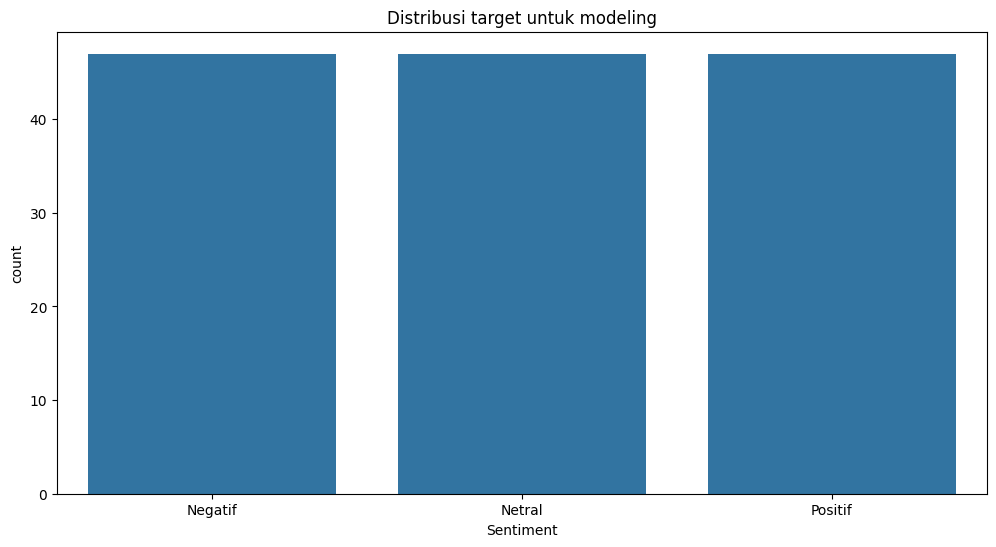

In [ ]:
# Resampling dengan metode smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=2)
X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train_cv)
plt.title('Distribusi target untuk modeling')
plt.show()

In [ ]:
# naive bayes untuk data baru
mnb = MultinomialNB()

# Menentukan parameter untuk grid search
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],  # Parameter smoothing, menghindari probabilitas nol
    'fit_prior': [True, False]         # Menentukan apakah model akan menghitung probabilitas kelas priors
}

# Melakukan grid search dengan cross-validation (cv=5)
nb_model_cv = GridSearchCV(estimator=mnb, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Melatih model dengan data training
nb_model_cv.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_cv = nb_model_cv.best_estimator_.predict(X_test_cv)

print("\n\nClassification Report Naive Bayes (Tuned):")
print(classification_report(y_test_cv, y_pred_cv))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.75      1.00      0.86        12
      Netral       0.00      0.00      0.00         3
     Positif       0.00      0.00      0.00         1

    accuracy                           0.75        16
   macro avg       0.25      0.33      0.29        16
weighted avg       0.56      0.75      0.64        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Mendapatkan hasil evaluasi model yang lebih rendah dari model yang sebelumnya**

### K-fold untuk random forest, logistic regression, dan SVM

Karena ketika dilakukan cross validation di ketiga model, didapatkan fold yang mengalami akurasi trainning model yang rendah berada di fold 2 yaitu indeks 9-17, sehingga dilakukan drop pada fold tersebut

In [ ]:
# Menampilkan data pada baris indeks ke 9 sampai 17
df_copy.iloc[np.r_[9:18]]

,username,tweet,Sentiment
9,GDANGGORENG,duga moga salah duga kongkalikong total bangun rumah sampe jauh bawah moga bener duga,Negatif
10,kiwitiauw,rumah juta menteri model petak kah iya bikin ikn,Netral
11,wenairead,mahasiswa turut proyek potensi korupsi ugalugalan dana alih bangun sekolah daerah dalam batas baik sekolah puskesmas rusak indonesia dampak,Negatif
12,panggilajaayu,banding nyoblos prabroro anisa,Netral
13,_L0KA,simak,Netral
14,cloudzise,paham tim nyimak,Netral
15,Lylr_21,urgent biaya kota pindah kota ada maju jakarta lahan korupsi rawan kena isu lingkung hutan kalimantan biar hutan lindung,Negatif
16,moonavile,sesuai dilaksanain bilang merta biar java central asli simbol perata bikin rumah jabat satu warga beli air bersih pake,Negatif
17,pillowaguilina,ikn mending kota kasih proyek strategis negara kaya solo biar kembang ikn mending transportasi kabupaten layak ikn mending bikin puskesmas ramah pasien ain dokter kompeten,Negatif


In [ ]:
# Menghapus indeks data yang cukup anomali
df_cv_2 = df_copy.drop(df_copy.index[np.r_[9:18]], axis=0)

In [ ]:
df_cv_2["Sentiment"].value_counts()

,count
Sentiment,
Negatif,59
Netral,15
Positif,6


In [ ]:
# vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_cv2 = tfidf_vectorizer.fit_transform(df_cv_2['tweet'])
X_tfidf_cv2.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.20736895],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Splitting
X_train_cv2, X_test_cv2, y_train_cv2, y_test_cv2 = train_test_split(X_tfidf_cv2, df_cv_2['Sentiment'], test_size=0.2, random_state=42,stratify=df_cv_2['Sentiment'])
X_train_cv2.shape, X_test_cv2.shape

((64, 608), (16, 608))

In [ ]:
y_test_cv2.value_counts()

,count
Sentiment,
Negatif,12
Netral,3
Positif,1


In [ ]:
y_train_cv2.value_counts()

,count
Sentiment,
Negatif,47
Netral,12
Positif,5


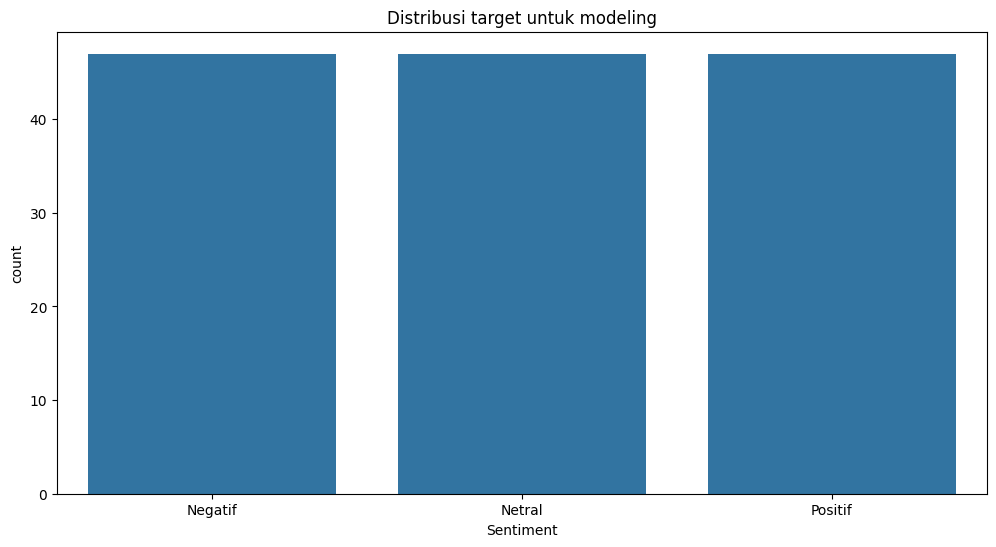

In [ ]:
# resampling
smote = SMOTE(random_state=42,k_neighbors=2)
X_train_cv2, y_train_cv2 = smote.fit_resample(X_train_cv2, y_train_cv2)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train_cv2)
plt.title('Distribusi target untuk modeling')
plt.show()

In [ ]:
#random forest cv
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

rf_model_cv2 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,  # Cross-validation folds
    scoring='accuracy',  # Metrik evaluasi
    verbose=1,  # Menampilkan proses pencarian
)

rf_model_cv2.fit(X_train_cv2, y_train_cv2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_cv2 = rf_model_cv2.best_estimator_.predict(X_test_cv2)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test_cv2, y_pred_cv2))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.73      0.92      0.81        12
      Netral       0.00      0.00      0.00         3
     Positif       0.00      0.00      0.00         1

    accuracy                           0.69        16
   macro avg       0.24      0.31      0.27        16
weighted avg       0.55      0.69      0.61        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Logistic regression
# Membuat model Logistic Regression
log_reg = LogisticRegression(max_iter=3000, random_state=42)

# Menentukan parameter untuk grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'penalty': ['l2'],                    # Regularization type (l2 adalah yang paling umum)
    'solver': ['liblinear', 'saga'],      # Algoritma solver yang digunakan
    'max_iter': [100, 200, 300]           # Jumlah iterasi yang digunakan dalam proses konvergensi
}

# Melakukan grid search dengan cross-validation (cv=5)
lr_model_cv2 = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Melatih model dengan data training
lr_model_cv2.fit(X_train_cv2, y_train_cv2)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_cv2 = lr_model_cv2.best_estimator_.predict(X_test_cv2)

print("\n\nClassification Report for Logistic Regression (Tuned):")
print(classification_report(y_test_cv2, y_pred_cv2))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.71      0.83      0.77        12
      Netral       0.00      0.00      0.00         3
     Positif       0.00      0.00      0.00         1

    accuracy                           0.62        16
   macro avg       0.24      0.28      0.26        16
weighted avg       0.54      0.62      0.58        16



In [ ]:
# Membuat model SVM
svm_model = SVC()

# Menentukan parameter untuk grid search
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Jenis kernel
    'degree': [2, 3, 4],            # Derajat polinomial (digunakan jika kernel='poly')
    'gamma': ['scale', 'auto']      # Kernel coefficient untuk 'rbf', 'poly', dan 'sigmoid'
}

# Inisialisasi GridSearchCV
svm_model_cv2 = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metrik evaluasi
    cv=5,                # Cross-validation dengan 5 fold
    verbose=1,           # Menampilkan proses tuning
    n_jobs=-1            # Menggunakan semua core yang tersedia
)

# Melatih model dengan data training
svm_model_cv2.fit(X_train_cv2, y_train_cv2)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_cv2 = svm_model_cv2.best_estimator_.predict(X_test_cv2)

print("\n\nClassification Report for SVM (Tuned):")
print(classification_report(y_test_cv2, y_pred_cv2))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.73      0.92      0.81        12
      Netral       0.00      0.00      0.00         3
     Positif       0.00      0.00      0.00         1

    accuracy                           0.69        16
   macro avg       0.24      0.31      0.27        16
weighted avg       0.55      0.69      0.61        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Menunjukkan hasil evaluasi model yang lebih rendah juga dari pada model sebelumnya**

### Hasil

Setelah dilakukan k-fold cross validation pada setiap model, mendapatkan hasil evaluasi model yang lebih rendah dari pada cara yang sebelumnya. Dari analisa kami, hal ini terjadi karena fold yang memiliki akurasi yang rendah lalu dilakukan drop fold tersebut menambah ketidakseimbangan sentiment karena fold yang memiliki akurasi rendah itu merupakan fold yang memuat sentiment positif dan netral yang dimana jika dilakukan drop maka akan mengurangi Sentiment yang minoritas.
**Oleh karena itu, cara kedua bukan langkah yang tepat**

> **Oleh karena itu, cara kedua bukan langkah yang tepat**



## 3. Melakukan resampling sebelum splitting dataset agar sentiment lebih seimbang baik di data training dan juga testing

Karena datset memiliki sentiment yang tidak seimbang sehingga kami melakukan proses resampling sebelum dilakukan splitting agar ketika dilakukan splitting baik data testing dan data trainng juga seimbang untuk persebaran sentimentnya

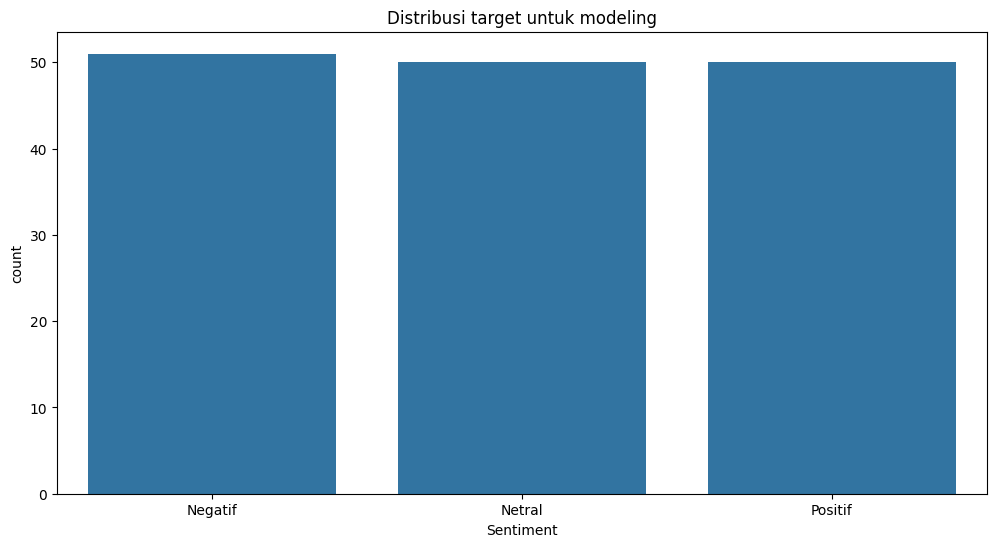

In [ ]:
# resampling dengan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x, y)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [ ]:
# data sebelum resampling
y.value_counts()

,count
Sentiment,
Negatif,64
Netral,19
Positif,6


In [ ]:
# data sesudah resampling
y_smote.value_counts()

,count
Sentiment,
Netral,64
Negatif,64
Positif,64


In [ ]:
# Splitting
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42,stratify= y_smote)
X_smote_train.shape, X_smote_test.shape

((153, 643), (39, 643))

In [ ]:
# persebaran sentiment di data train
y_smote_train.value_counts()

,count
Sentiment,
Netral,51
Negatif,51
Positif,51


In [ ]:
# persebaran sentiment di data test
y_smote_test.value_counts()

,count
Sentiment,
Positif,13
Netral,13
Negatif,13


### Melatih Model dataset baru

In [ ]:
# random forest dengan tunning
rf_model2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model2.fit(X_smote_train,y_smote_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Evaluasi Random Forest
from sklearn.metrics import classification_report

y_pred_rf3 = rf_model2.best_estimator_.predict(X_smote_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_smote_test, y_pred_rf3))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.72      1.00      0.84        13
      Netral       1.00      0.69      0.82        13
     Positif       1.00      0.92      0.96        13

    accuracy                           0.87        39
   macro avg       0.91      0.87      0.87        39
weighted avg       0.91      0.87      0.87        39



In [ ]:
# Model Logistic Regression
# Melakukan grid search dengan cross-validation (cv=5)
# Menentukan parameter untuk grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'penalty': ['l2'],                    # Regularization type (l2 adalah yang paling umum)
    'solver': ['liblinear', 'saga'],      # Algoritma solver yang digunakan
    'max_iter': [100, 200, 300]           # Jumlah iterasi yang digunakan dalam proses konvergensi
}
lr_model2 = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)
lr_model2.fit(X_smote_train,y_smote_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluasi Model Logistic Regression
from sklearn.metrics import classification_report

y_pred_rf3 = lr_model2.best_estimator_.predict(X_smote_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_smote_test, y_pred_rf3))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.86      0.92      0.89        13
      Netral       0.92      0.85      0.88        13
     Positif       1.00      1.00      1.00        13

    accuracy                           0.92        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
# Model Naive Bayes
# Menentukan parameter untuk grid search
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],  # Parameter smoothing, menghindari probabilitas nol
    'fit_prior': [True, False]         # Menentukan apakah model akan menghitung probabilitas kelas priors
}

# Melakukan grid search dengan cross-validation (cv=5)
nb_model2 = GridSearchCV(estimator=mnb, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Melatih model dengan data training
nb_model2.fit(X_smote_train,y_smote_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [ ]:
# evaluasi model naive bayes
from sklearn.metrics import classification_report

y_pred_rf3 = nb_model2.best_estimator_.predict(X_smote_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_smote_test, y_pred_rf3))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       1.00      0.92      0.96        13
      Netral       0.93      1.00      0.96        13
     Positif       1.00      1.00      1.00        13

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



In [ ]:
# Membuat model SVM
svm_model = SVC()

# Menentukan parameter untuk grid search
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Jenis kernel
    'degree': [2, 3, 4],            # Derajat polinomial (digunakan jika kernel='poly')
    'gamma': ['scale', 'auto']      # Kernel coefficient untuk 'rbf', 'poly', dan 'sigmoid'
}

# Inisialisasi GridSearchCV
svm_grid2 = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metrik evaluasi
    cv=5,                # Cross-validation dengan 5 fold
    verbose=1,           # Menampilkan proses tuning
    n_jobs=-1            # Menggunakan semua core yang tersedia
)

# Melatih model dengan data training
svm_grid2.fit(X_smote_train,y_smote_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluasi model SVM
from sklearn.metrics import classification_report

y_pred_rf3 = svm_grid2.best_estimator_.predict(X_smote_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_smote_test, y_pred_rf3))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.87      1.00      0.93        13
      Netral       1.00      0.85      0.92        13
     Positif       1.00      1.00      1.00        13

    accuracy                           0.95        39
   macro avg       0.96      0.95      0.95        39
weighted avg       0.96      0.95      0.95        39



### Melakukan K-fold cross valdation untuk dataset ini

In [ ]:
Perform_cross_val(rf_model2.best_estimator_, 10,X_smote, y_smote, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9389473684210528
CV results: [0.75       0.85       1.         0.89473684 0.89473684 1.
 1.         1.         1.         1.        ]



In [ ]:
Perform_cross_val(lr_model2.best_estimator_, 10,X_smote, y_smote, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9694736842105263
CV results: [0.9        0.9        0.94736842 1.         0.94736842 1.
 1.         1.         1.         1.        ]



In [ ]:
Perform_cross_val(nb_model2.best_estimator_, 10,X_smote, y_smote, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9697368421052632
CV results: [0.95       0.8        0.94736842 1.         1.         1.
 1.         1.         1.         1.        ]



In [ ]:
Perform_cross_val(svm_grid2.best_estimator_, 10,X_smote, y_smote, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.985
CV results: [0.95 0.9  1.   1.   1.   1.   1.   1.   1.   1.  ]



### Hasil

Hasil menunjukkan bahwasanya hasil evaluasi ke-empat model menunjukkan akurasi yang mendekati 1 yang dimana data ini overvitting karena proses resampling dilakukan sebelum splittinh yang membuat data pelatihan dan testing akan memiliki banyak contoh yang sama atau sangat mirip. Dengan melakukan resampling sebelum splitting, informasi yang dihasilkan melalui resampling bisa bocor ke dalam set pelatihan dan pengujian, menyebabkan overfitting dan penurunan kemampuan generalisasi model.

> Oleh karena itu, walau model menunjukkan akurasi yang tinggi tetapi tidak menunjukkan itu akurasi yang sebenarnya, sehingga cara ini tidak tepat



## Hasil Model Yang digunakan





> **Model Naive bayes Sebelum dilakukan K-fold yang memiliki akurasi 78 % dan lebih bisa memprediksi Sentimen data **

Faktor yang mempengaruhi hasil akurasi model dari capstone ini


*   Dataset yang kecil, ukuran dataset yang hanya 89 baris membuat model kurang baik dalam melakukan trainning sehingga membuat model kurang dalam memprediksi data baru
*   Sentiment yang tidak seimbang sehingga membuat model lebih cendreng memprediksi sentiment negatif, walau dilakukan resampling, model masih sulit untuk memprediksi sentiment lain

* Saat dilakukan K-fold Cross Validation , model mengalami penurusan akurasi karena fold yang didrop merupakan fold yang memiliki sentiment positif dan netral sehingga membuat data lebih tidak seimbang



## Pengujian Dengan Model yang digunakan

In [ ]:
# Memuat model dengan joblib
model = joblib.load('naive_bayes_model.pkl')
# memuat vektorization
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [ ]:
while True:
    # Mengambil input teks dari pengguna
    new_text = input("Masukkan teks untuk prediksi sentimen (ketik 'STOP' untuk selesai): ")

    # Mengecek apakah pengguna ingin keluar
    if new_text.strip().upper() == 'STOP':
        print("Proses prediksi selesai.")
        break

    # Mengubah teks menjadi bentuk numerik menggunakan tf-idf vectorizer
    transformed_text2 = tfidf_vectorizer.transform([new_text])

    # Melakukan prediksi menggunakan model yang dimuat
    prediction = model.predict(transformed_text2)

    # Menampilkan hasil prediksi
    print(f"Teks: {new_text}\nPrediksi Sentimen: {prediction[0]}\n")

Masukkan teks untuk prediksi sentimen (ketik 'STOP' untuk selesai): ikn pindah membuat pejabat banyak korupsi
Teks: ikn pindah membuat pejabat banyak korupsi
Prediksi Sentimen: Negatif

Masukkan teks untuk prediksi sentimen (ketik 'STOP' untuk selesai): tim menyimak
Teks: tim menyimak
Prediksi Sentimen: Netral

Masukkan teks untuk prediksi sentimen (ketik 'STOP' untuk selesai): hanya hambur hambur uang saja
Teks: hanya hambur hambur uang saja
Prediksi Sentimen: Negatif

Masukkan teks untuk prediksi sentimen (ketik 'STOP' untuk selesai): membuat masyarakat sejahtera
Teks: membuat masyarakat sejahtera
Prediksi Sentimen: Positif

Masukkan teks untuk prediksi sentimen (ketik 'STOP' untuk selesai): lebih banyak lowongan kerja
Teks: lebih banyak lowongan kerja
Prediksi Sentimen: Positif

Masukkan teks untuk prediksi sentimen (ketik 'STOP' untuk selesai): STOP
Proses prediksi selesai.


# Kesimpulan Akhir



1. Dari Sentiment Analysis, menunjukkan bahwa tanggapan atau tweet yang ada pada akun X @tanyarlfes menunjukkan bahwasanya sebagian besar tanggapan menunjunjukkan tanggapan negatif yang tidak menerima proyek IKN.
2. Dari modelling, Dari dataset yang diberikan yang dimana berukuran kecil dan persebaran sentiment yang sangat tidak seimbang membuat sulit dalam menemukan model yang baik. Sehingga dari beberapa cara yang dilakukan didapatkan model yang akan digunakan yaitu model naive bayes pada cara pertama karena menghasilkan akurasi yang cukup, dan juga tidak overfitting, serta bagus jika diuji dengan data baru

# Link terkait
link drive file, model, dan lainnya:
https://drive.google.com/drive/folders/1f1g7lkBm2RZh3zsHwKs0AaTZHS67IUaN?usp=sharing

Link Github :
https://github.com/zakiahmadbasyary/Capstone_Mikti

Link deploy menggunakan streamlit
https://capstonemikti-u83cyzv4n3afgmzegz8g9q.streamlit.app/